**CNNによる2次元顔画像表情判定**

In [1]:
!ps aux
!kill -9 <pid>

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0    992     4 ?        Ss   11:47   0:00 /sbin/docker-
root           7  0.0  0.3 337512 48412 ?        Sl   11:47   0:00 /tools/node/b
root          17  0.0  0.0  35892  4888 ?        Ss   11:47   0:00 tail -n +0 -F
root          41  0.0  0.3 160352 41840 ?        S    11:47   0:00 python3 /usr/
root          54  0.1  0.4 193896 59892 ?        Sl   11:47   0:01 /usr/bin/pyth
root          55  0.0  0.0 706824  5260 ?        Sl   11:47   0:00 /usr/local/bi
root          66 21.1  0.8 689464 114900 ?       Ssl  11:58   0:01 /usr/bin/pyth
root          86  0.0  0.1  93580 14440 ?        Sl   11:58   0:00 /usr/bin/pyth
root         103  0.0  0.0  59036  6252 ?        R    11:58   0:00 ps aux
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `kill -9 <pid>'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

**訓練画像、検証画像、テスト画像のディレクトリ**

In [4]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/kaggle/Facial Experience'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

img_rows, img_cols = 48, 48

os.path.join(base_dir,'path')

**ImageDataGeneratorを使って画像データを拡張する**

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=2048,
                                                    shuffle=True)

Found 93005 images belonging to 7 classes.


train 93005枚
5x11x19x89

In [7]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = valid_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(img_rows, img_cols),
                                                        color_mode='rgb',
                                                        classes=classes,
                                                        class_mode='categorical',
                                                        batch_size=256,
                                                        shuffle=True)

Found 17376 images belonging to 7 classes.


valid 17376枚

**CNNモデル**

出力層
二値分類→sigmoid
他クラス分類→softmax
回帰分類→恒等関数

In [8]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [9]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**コールバックを使った学習**

In [10]:
hdf5_file = os.path.join(base_dir, 'model.hdf5')

In [12]:
model.load_weights(hdf5_file)

再度ここから

In [13]:
from keras.callbacks import ModelCheckpoint
modelCheckpoint = ModelCheckpoint(filepath = hdf5_file,
                                  monitor='loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [36]:
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=67,
                    callbacks=[modelCheckpoint],
                    verbose=1)

Epoch 1/5
45/45 [==============================] - 470s 10s/step - loss: 0.9478 - acc: 0.6641 - val_loss: 1.2657 - val_acc: 0.5450

Epoch 00001: loss improved from 0.95095 to 0.94775, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 2/5
45/45 [==============================] - 451s 10s/step - loss: 0.9376 - acc: 0.6668 - val_loss: 1.3107 - val_acc: 0.5336

Epoch 00002: loss improved from 0.94775 to 0.93761, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 3/5
45/45 [==============================] - 448s 10s/step - loss: 0.9340 - acc: 0.6679 - val_loss: 1.3032 - val_acc: 0.5366

Epoch 00003: loss improved from 0.93761 to 0.93402, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 4/5
45/45 [==============================] - 456s 10s/step - loss: 0.9318 - acc: 0.6692 - val_loss: 1.3101 - val_acc: 0.5300

Epoch 00004: loss improved from 0.93402 to 0.93183, saving model to /content/drive/MyDrive/

In [37]:
model.save(hdf5_file)

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

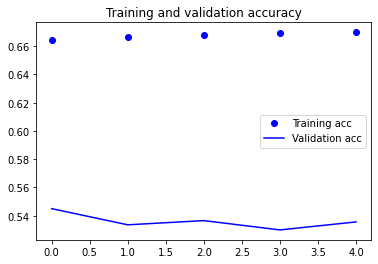

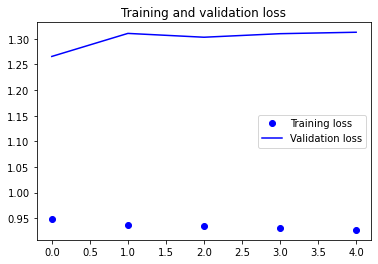

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**テスト**

In [41]:
# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [42]:
# model=keras.models.load_model(hdf5_file)

In [43]:
# import numpy as np
# test_generator = test_datagen.flow_from_directory(directory=test_dir,
#                                                   target_size=(img_rows, img_cols),
#                                                   color_mode='rgb',
#                                                   classes=classes,
#                                                   class_mode='categorical',
#                                                   batch_size=32,
#                                                   shuffle=False)

# test_steps_per_Epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [44]:
# predictions = model.predict_generator(test_generator, steps=test_steps_per_Epoch)
# # Get most likely class
# predicted_classes = np.argmax(predictions, axis=1)
# # Ground-Truthクラスとクラスラベルを取得する
# true_classes = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

In [45]:
# from sklearn import metrics
# # scikit-learnを使用して統計を取得する
# report = metrics.classification_report(true_classes, 
#                                        predicted_classes, 
#                                        labels=np.arange(len(classes)),
#                                        target_names=classes)
# print(report)

正解率（accuracy）: accuracy_score()

適合率（precision）: precision_score()

再現率（recall）: recall_score()

F1値（F1-measure）: f1_score()

**混同行列**


In [46]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Y_pred = model.predict_generator(test_generator, test_steps_per_Epoch)
# y_pred = np.argmax(Y_pred, axis=1)
# print("Confusion Matrix")
# # confusion matrixの作成
# cm = confusion_matrix(test_generator.classes, y_pred)
# #表示
# cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# fig, ax = plt.subplots(figsize=(10, 10))
# cmd.plot(ax=ax, cmap="Blues")

**参考**


*   [Keras / CNN] 多クラス画像分類 --- ラーメンの味分類

    https://qiita.com/Phoeboooo/items/cfe8560fe8a285855340
*   リスト項目

